In [16]:
import pandas as pd

In [17]:
DONNEES = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQBmY_1b2XT94E60Ma_PcEVQcuonGk6r9DR-oXNB2KhrmoQtoJRfkjuqzN-w1XR8HXN0j3h_JLYyqUm/pub?gid=0&single=true&output=csv"

In [18]:
df = pd.read_csv(DONNEES)
df = df[1:-2]

In [19]:
df.head(5)

,date,mètres,cumul (km),nb jours,objectif,écart / objectif,commentaire,vélo
1,02/01/2022,"42253,4","42,25",1.0,"12,33","29,92",NaN,pelso
2,08/01/2022,"88027,5","130,28",7.0,"86,30","43,98",NaN,pelso
3,16/01/2022,"93228,6","223,51",15.0,"184,93","38,58",saintes-maries,pelso
4,30/01/2022,"52458,7","275,97",29.0,"357,53","-81,57",bcp de vent,giant
5,06/02/2022,"53686,5","329,65",36.0,"443,84","-114,18",encore du vent,giant


In [20]:
df['mètres'] = df['mètres'].apply(lambda x: ''.join(x.split()))
df['mètres'] = df['mètres'].apply(lambda x : x.replace(",","."))


In [21]:
df['mètres'] = df['mètres'].astype('float')

In [22]:
round(df['mètres'].sum()/1000,1)

3677.7

In [23]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y" )

In [24]:
df['jour'] = df.date.dt.day
df['mois'] = df.date.dt.month
df['sem'] = df.date.dt.isocalendar().week
df['cum'] = df['mètres'].cumsum()/1000

In [25]:
df[['date','jour','mois','sem','mètres','cum']].head(5)

,date,jour,mois,sem,mètres,cum
1,2022-01-02,2,1,52,42253.4,42.2534
2,2022-01-08,8,1,1,88027.5,130.2809
3,2022-01-16,16,1,2,93228.6,223.5095
4,2022-01-30,30,1,4,52458.7,275.9682
5,2022-02-06,6,2,5,53686.5,329.6547


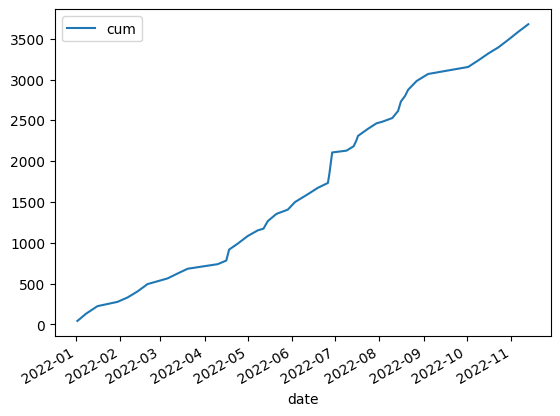

In [26]:
df.plot('date','cum');

In [27]:
def test():
    return round(sum()/1000,1)

In [41]:
df_mois = df.groupby('mois')['mètres'].sum()/1000
df_mois_1 = df.groupby('mois')['mètres'].agg([('Somme','sum'),('Moyenne','mean')])

In [50]:
df_mois_1 = df_mois_1.apply(lambda x: round(x/1000,1))


<AxesSubplot:xlabel='Moyenne'>

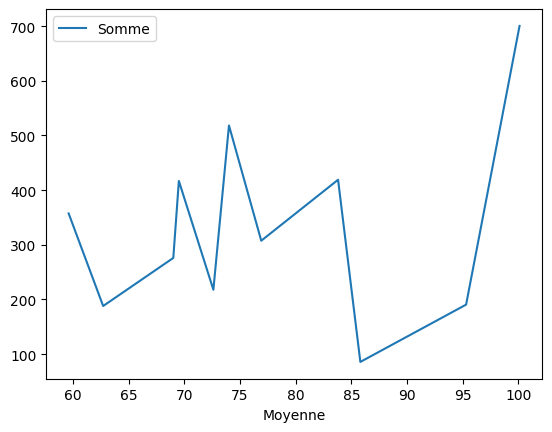

In [54]:
df_mois_1.sort_values(by='Moyenne').plot('Moyenne','Somme')

In [29]:
df_mois_1['Somme'][3]/1000

188.0891

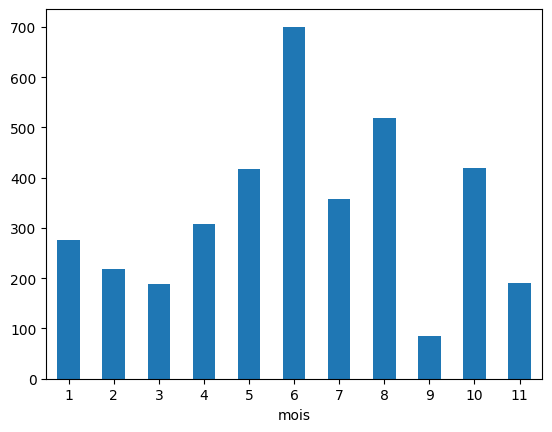

In [30]:
df_mois.plot(kind='bar', rot='0');

In [31]:
df_type = df.groupby('vélo')['mètres'].sum()/1000

In [32]:
df_type

vélo
B'Twin         55.9808
giant         249.9313
metabikes     511.3880
pelso        1497.0897
vtt            45.2262
wilierT      1318.1317
Name: mètres, dtype: float64

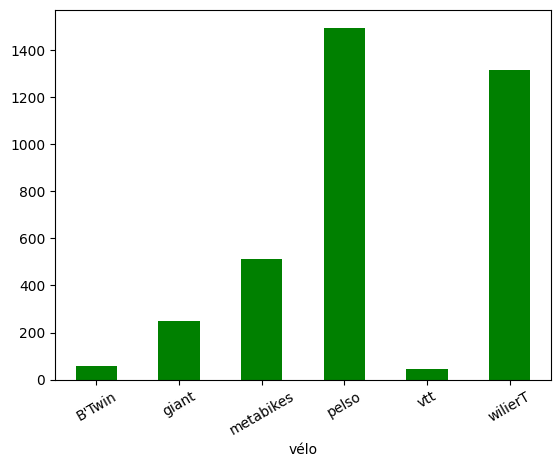

In [33]:
df_type.plot(kind='bar', rot='30', color='green');